 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Files to load 
df = pd.read_csv(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\algo_returns.csv")
print(df)
df = pd.read_csv(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\whale_returns.csv")
print(df)
df = pd.read_csv(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\sp_tsx_history.csv")
print(df)

            Date    Algo 1    Algo 2
0     2014-05-28  0.001745       NaN
1     2014-05-29  0.003978       NaN
2     2014-05-30  0.004464       NaN
3     2014-06-02  0.005692       NaN
4     2014-06-03  0.005292       NaN
...          ...       ...       ...
1236  2019-04-25  0.000682 -0.007247
1237  2019-04-26  0.002981  0.005256
1238  2019-04-29  0.005208  0.002829
1239  2019-04-30 -0.002944 -0.001570
1240  2019-05-01  0.000094 -0.007358

[1241 rows x 3 columns]
            Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0     2015-03-02                        NaN                 NaN   
1     2015-03-03                  -0.001266           -0.004981   
2     2015-03-04                   0.002230            0.003241   
3     2015-03-05                   0.004016            0.004076   
4     2015-03-06                  -0.007905           -0.003574   
...          ...                        ...                 ...   
1055  2019-04-25                  -0.000285           -0.00129

In [3]:
# Reading whale returns
wr = Path(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\whale_returns.csv")
whale_returns_df = pd.read_csv(wr, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [4]:
# Count nulls
whale_returns_df.isnull()
whale_returns_df.isna().sum().sum()

4

In [5]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
ag = Path(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\algo_returns.csv")
alg_daily_df = pd.read_csv(ag, index_col='Date', infer_datetime_format=True, parse_dates=True)
alg_daily_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
alg_daily_df.isnull()
alg_daily_df.isna().sum().sum()

6

In [8]:
# Drop nulls
alg_daily_df.dropna(inplace=True)
alg_daily_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sptsx = Path(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\sp_tsx_history.csv")
sptsx_ret_df = pd.read_csv(sptsx, index_col="Date", infer_datetime_format=True, parse_dates=True)
sptsx_ret_df.sort_index(inplace=True, ascending=True)
sptsx_ret_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
sptsx_ret_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sptsx_ret_df['Close'] = sptsx_ret_df['Close'].str.replace(',', '', regex=True)
sptsx_ret_df['Close'] = sptsx_ret_df['Close'].str.replace('$', '', regex=True)
sptsx_ret_df['Close'] = sptsx_ret_df['Close'].astype(float)
sptsx_ret_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sptsx_daily = sptsx_ret_df.pct_change()
sptsx_daily.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [13]:
# Drop nulls
sptsx_daily = sptsx_daily.dropna().copy()
sptsx_daily.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [14]:
# Check 
sptsx_daily.isna().sum().sum()

0

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sptsx_daily = sptsx_daily.rename(columns = {"Close" : "S&P Daily"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, alg_daily_df, sptsx_daily], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [17]:
# Reorganise primary stock data by having a column per symbol
combined_df.columns = ['SFML','P&C', 'TGML', 'BHI', 'AL1', 'AL2','S&P Daily']
combined_df

,SFML,P&C,TGML,BHI,AL1,AL2,S&P Daily
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

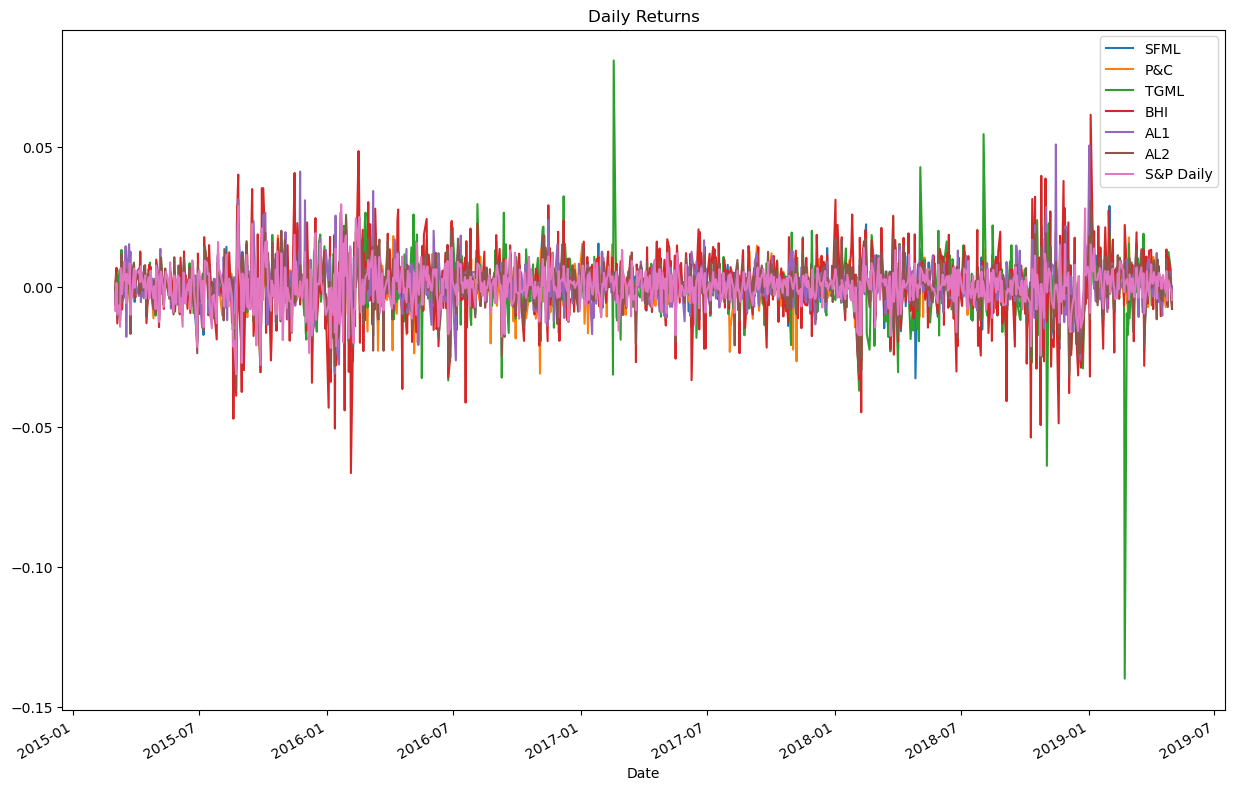

In [18]:
# Plot daily returns of all portfolios
daily_returns = combined_df
daily_returns.plot(figsize=(15,10), title = 'Daily Returns')

#### Calculate and Plot cumulative returns.

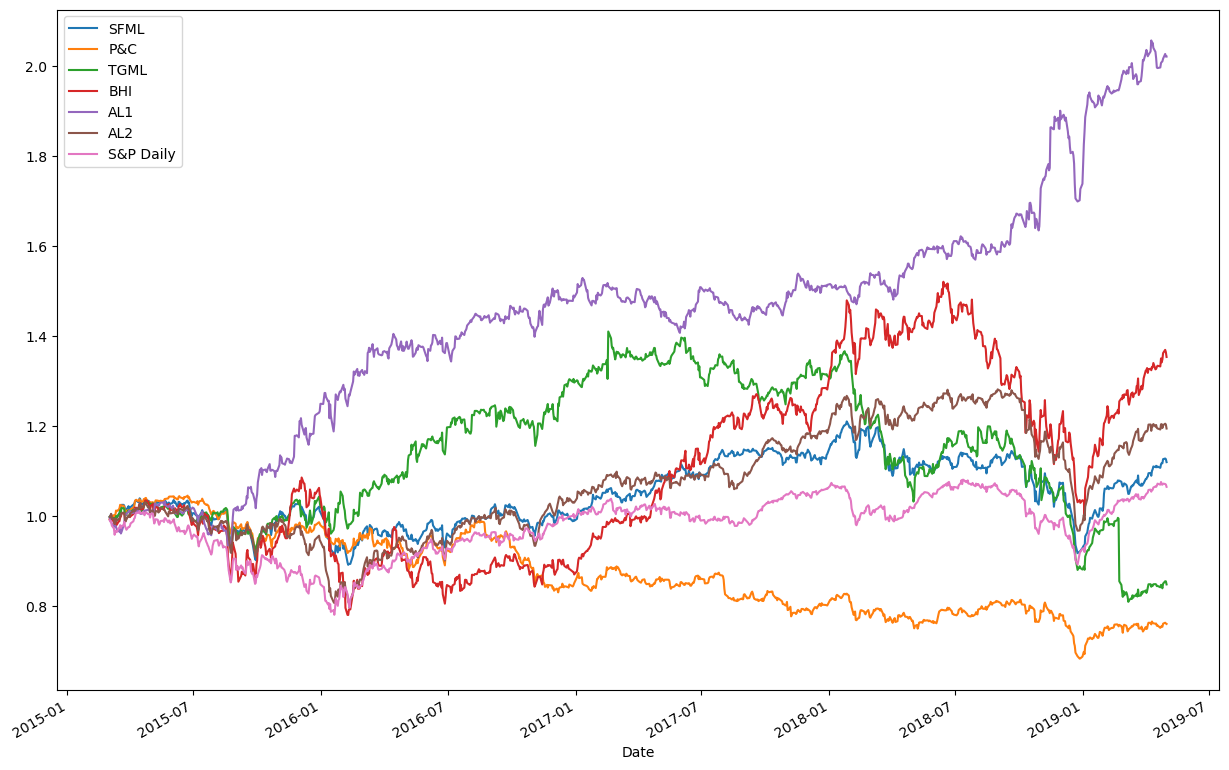

In [19]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
cumulative = (1+combined_df).cumprod().plot(figsize=(15,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

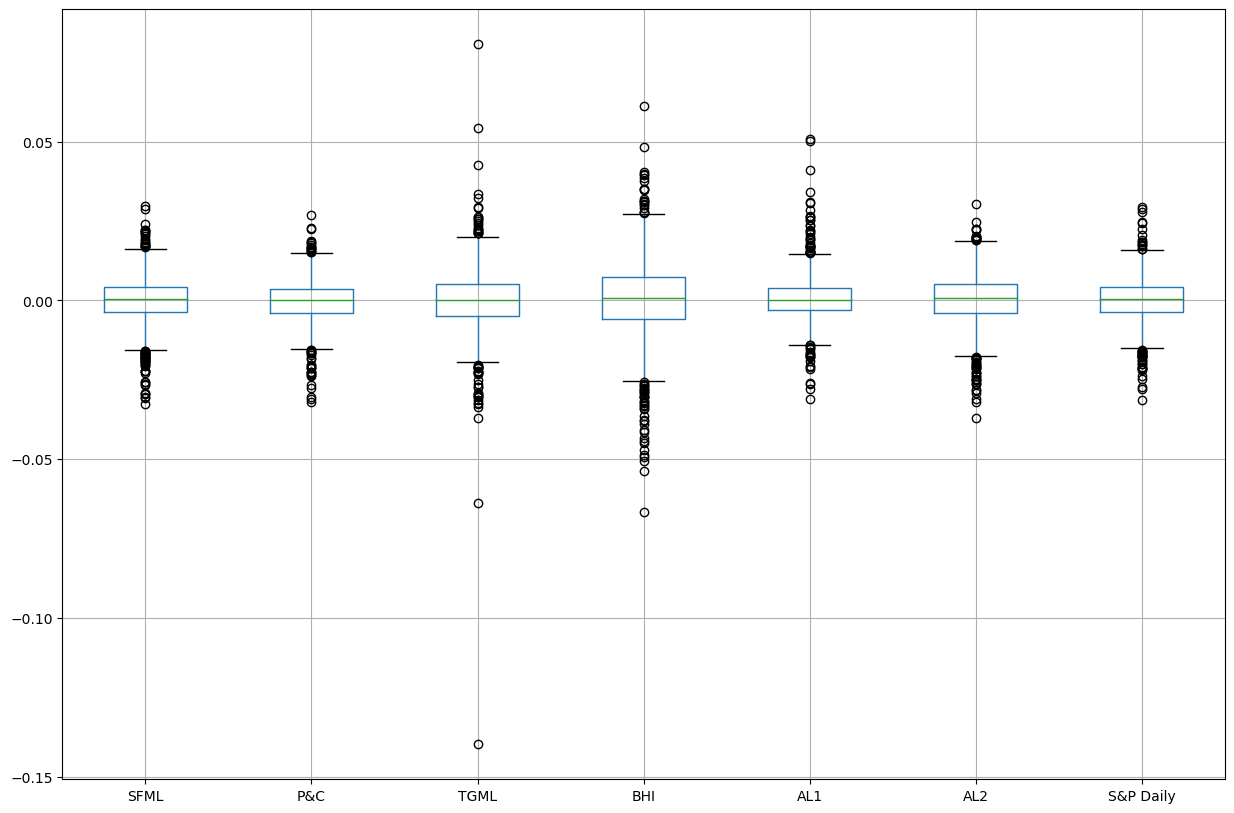

In [20]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(15,10))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
std=combined_df.std()
std.head()

SFML    0.007828
P&C     0.006982
TGML    0.010883
BHI     0.012826
AL1     0.007589
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [23]:
# Calculate  the daily standard deviation of S&P TSX 60
sp60 = combined_df["S&P Daily"].std()

In [24]:
# Determine which portfolios are riskier than the S&P TSX 60
index = 0
for risk in std :
    if risk == sp60:
        print (f"{std.index[index]} Portfolio has an equal risk as S&P TSX 60")
    elif risk > sp60:
        print (f"{std.index[index]} Portfolio has more risk than S&P TSX 60")
    elif risk < sp60:
        print (f"{std.index[index]} Portfolio has less risk than S&P TSX 60")
    else: 
        print (f"{std.index[index]} Portfolio does not have enough data to determine risk")
    index += 1
    

SFML Portfolio has more risk than S&P TSX 60
P&C Portfolio has less risk than S&P TSX 60
TGML Portfolio has more risk than S&P TSX 60
BHI Portfolio has more risk than S&P TSX 60
AL1 Portfolio has more risk than S&P TSX 60
AL2 Portfolio has more risk than S&P TSX 60
S&P Daily Portfolio has an equal risk as S&P TSX 60


### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annualized = combined_df.std() * np.sqrt(252)
annualized.sort_values(inplace=True)
annualized.head()

P&C          0.110841
S&P Daily    0.111664
AL1          0.120470
SFML         0.124259
AL2          0.132177
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Date'>

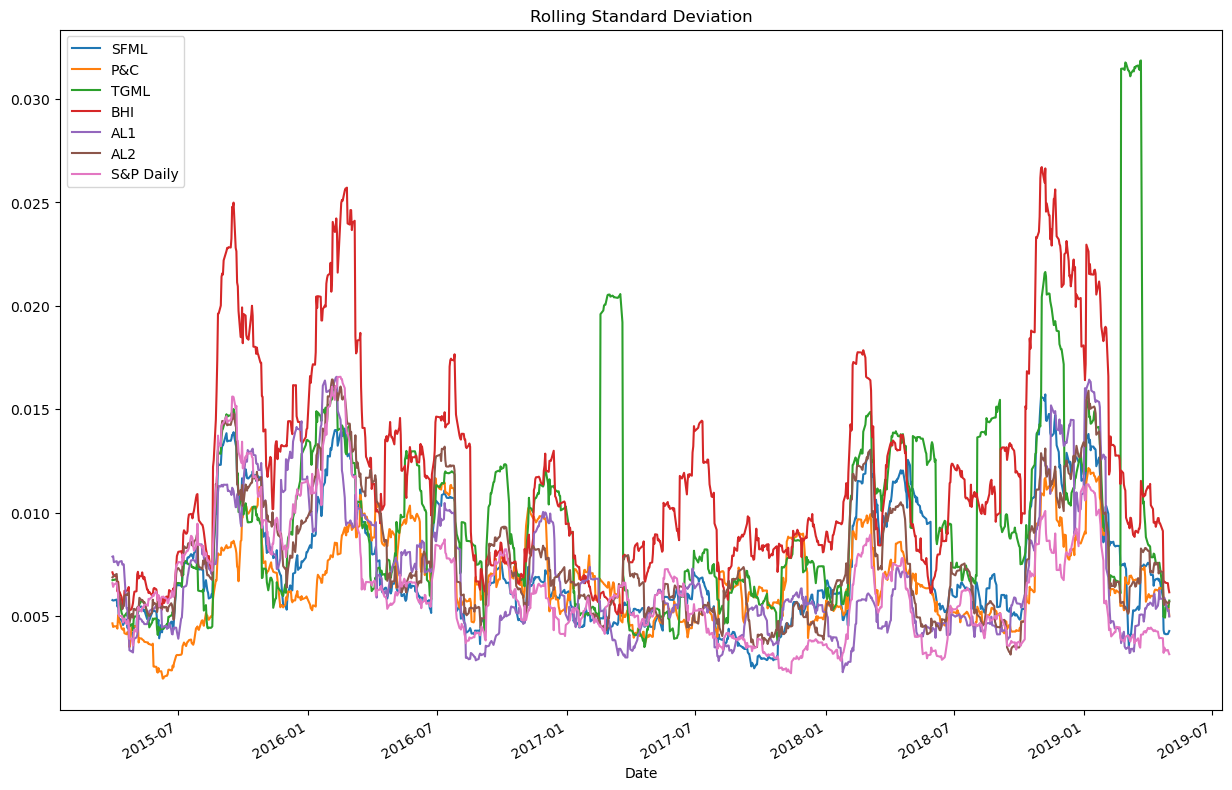

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rollingstd = combined_df.rolling(21).std()
rollingstd.dropna(inplace=True)

# Plot the rolling standard deviation
rollingstd.plot(figsize=(15,10), title='Rolling Standard Deviation')

### Calculate and plot the correlation

In [27]:
# Calculate the correlation
price_correlation = combined_df.corr()

# Display the correlation matrix
price_correlation

,SFML,P&C,TGML,BHI,AL1,AL2,S&P Daily
SFML,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
P&C,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TGML,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BHI,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
AL1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
AL2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P Daily,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

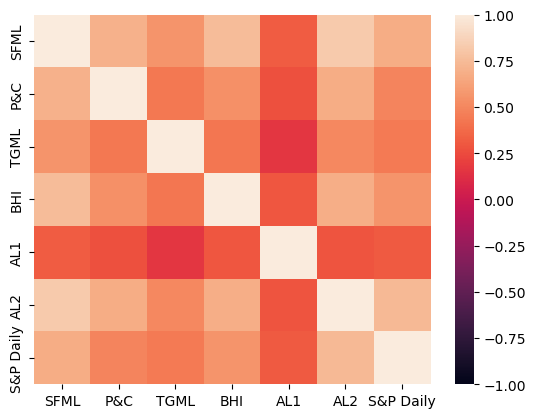

In [28]:
# Display the correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of AL2 Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

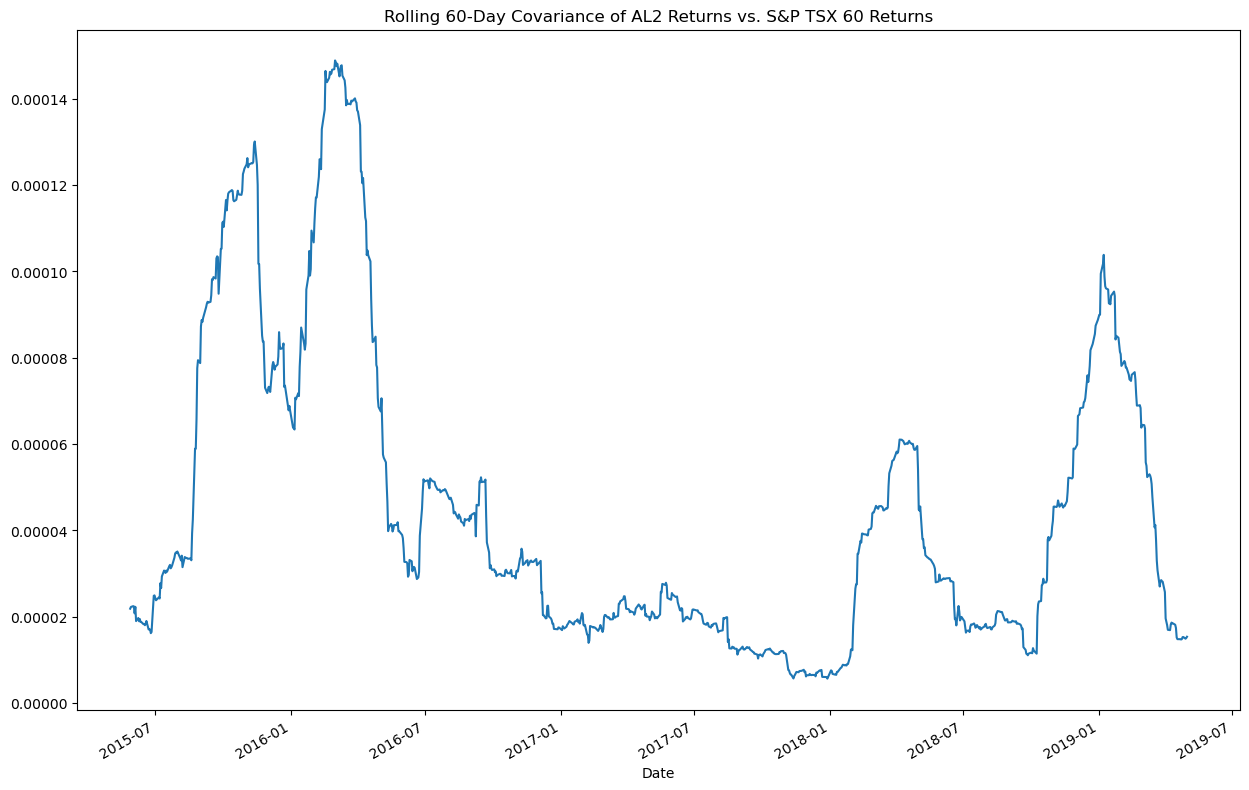

In [29]:
# Calculate covariance of a single portfolio
covariance = combined_df['AL2'].cov(combined_df['S&P Daily'])

# Calculate variance of S&P TSX
variance = combined_df ['S&P Daily'].var()

# Computing beta
al2_beta = covariance / variance

# Plot beta trend
rolling_covariance = combined_df['AL2'].rolling(window=60).cov(combined_df['S&P Daily'])
rolling_covariance.plot(figsize=(15, 10), title='Rolling 60-Day Covariance of AL2 Returns vs. S&P TSX 60 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [30]:
# Use `ewm` to calculate the rolling window
rolling_window = combined_df.ewm(halflife=21).std()
rolling_window

,SFML,P&C,TGML,BHI,AL1,AL2,S&P Daily
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


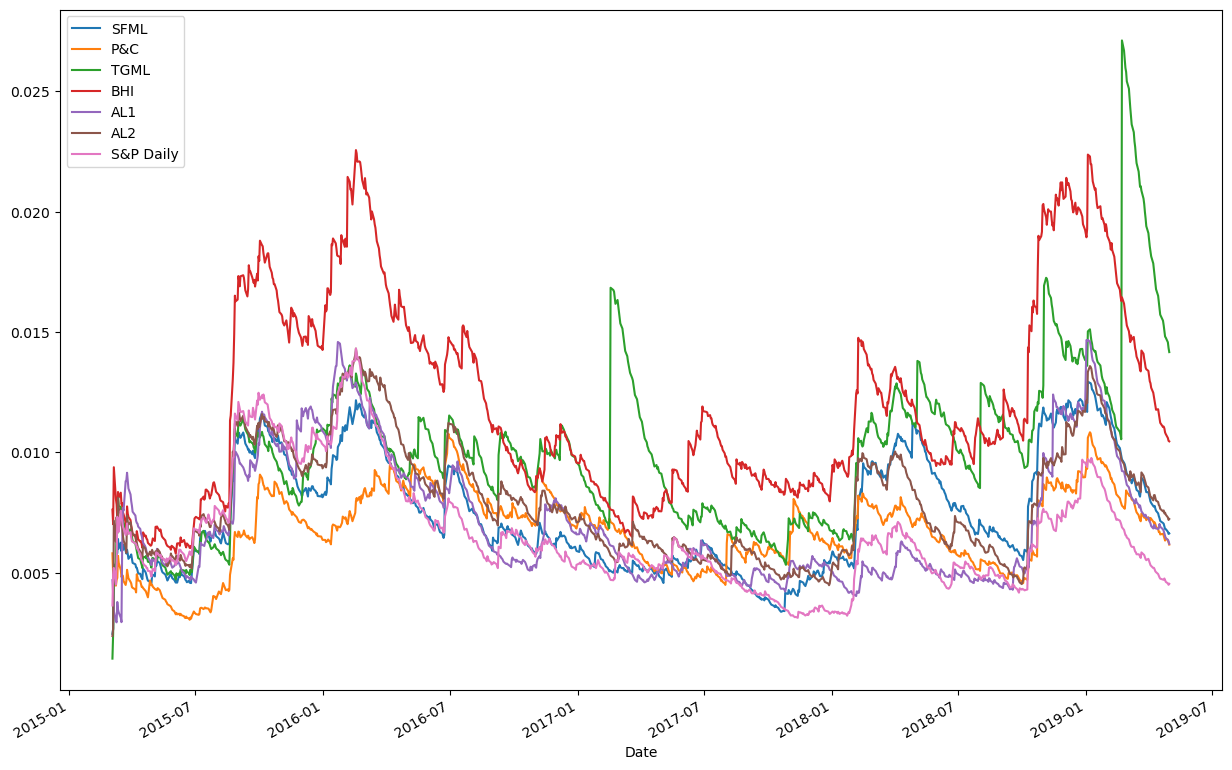

In [31]:
rolling_window = combined_df.ewm(halflife=21).std().plot(figsize=(15,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
# Annualized Sharpe Ratios

sharpe_ratios1 = (combined_df.mean()  * 252) / annualized
sharpe_ratios1

AL1          1.491514
AL2          0.396817
BHI          0.467045
P&C         -0.547594
S&P Daily    0.195550
SFML         0.286709
TGML        -0.144455
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

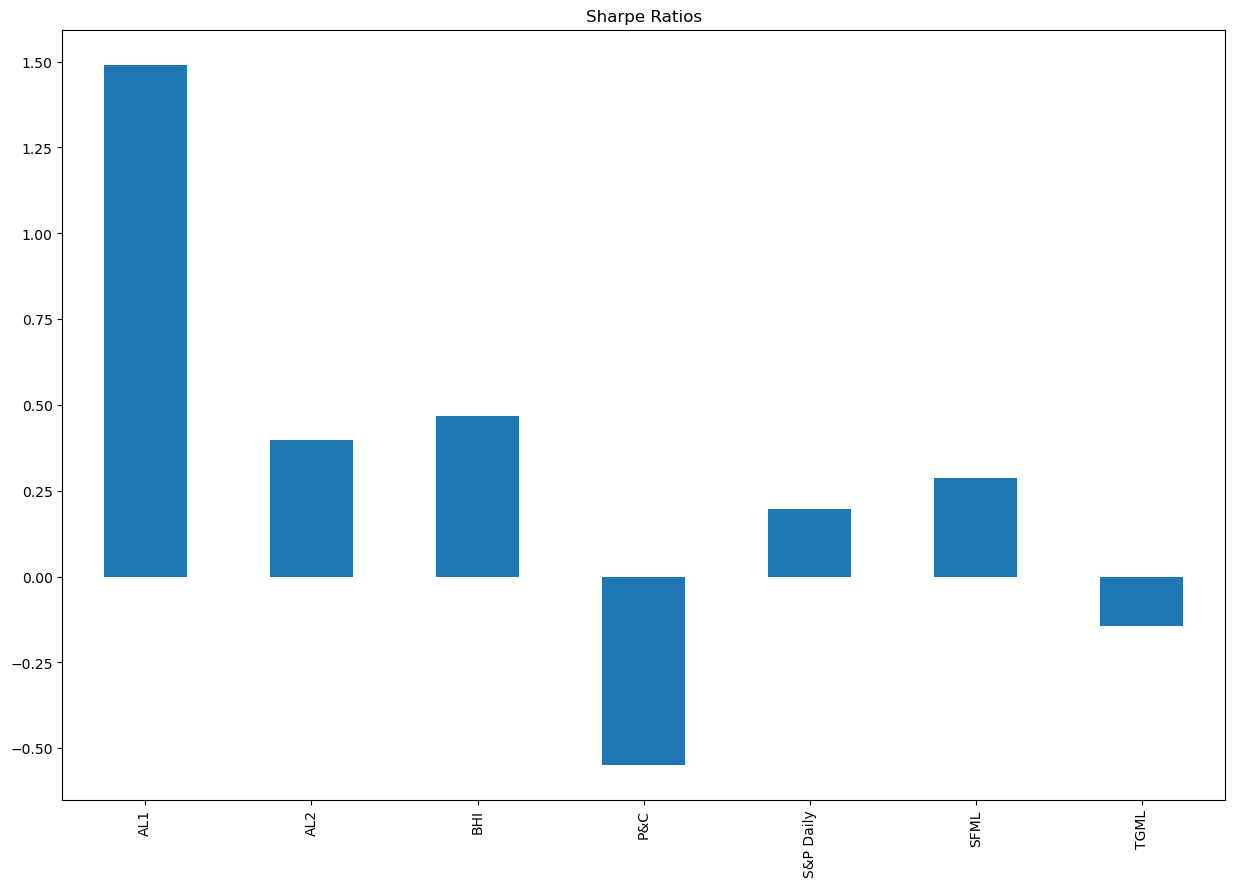

In [33]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios1.plot.bar(figsize=(15,10), title= 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.


In [34]:
#Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

#Setting Variables
index=0 
al1_performance = std['AL1']

#Determine AL1 Performance vs. Portfolio Performance

for performance in std: 
    if std.index[index] == 'AL1': 
        continue
    if performance == al1_performance:
        print(f"AL1 equally performed compared to {std.index[index]} portfolio")
    elif performance > al1_performance:
        print(f"AL1 outperformed compared to {std.index[index]} portfolio")
    elif performance < al1_performance:
        print(f"AL1 underperformed compared to {std.index[index]} portfolio")
    else:
        print(f"Not Comparable to S&P TSX 60 and the whales portfolios.")
    index+=1

AL1 outperformed compared to SFML portfolio
AL1 underperformed compared to P&C portfolio
AL1 outperformed compared to TGML portfolio
AL1 outperformed compared to BHI portfolio


In [35]:
#Setting Variables
index=0 
al2_performance = std['AL2']

#Determine AL2 Performance vs.Portfolio Performance
for performance in std: 
    if std.index[index] == 'AL2': 
        continue
    if performance == al2_performance:
        print(f"AL2 equally performed compared to {std.index[index]} portfolio")
    elif performance > al2_performance:
        print(f"AL2 outperformed compared to {std.index[index]} portfolio")
    elif performance < al2_performance:
        print(f"AL2 underperformed compared to {std.index[index]} portfolio")
    else:
        print(f"Not Comparable to S&P TSX 60 and the whales portfolios.")
    index+=1

AL2 underperformed compared to SFML portfolio
AL2 underperformed compared to P&C portfolio
AL2 outperformed compared to TGML portfolio
AL2 outperformed compared to BHI portfolio
AL2 underperformed compared to AL1 portfolio


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [36]:
# Reading data from 1st stock
L = Path(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\l_historical.csv")
L_df = pd.read_csv(L,index_col='Date', infer_datetime_format=True, parse_dates=True)
L_df = L_df.rename(columns = {'Close':'L'})
L_df.dropna(inplace=True)
L_df.head()

,Symbol,L
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [37]:
# Reading data from 2nd stock
otex = Path(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\otex_historical.csv")
otex_df = pd.read_csv(otex,index_col='Date', infer_datetime_format=True, parse_dates=True)
otex_df.dropna(inplace=True)
otex_df = otex_df.rename(columns = {'Close':'OTEX'})
otex_df.head().tail()

,Symbol,OTEX
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [38]:
# Reading data from 3rd stock
shop = Path(r"C:\Users\romai\OneDrive\Documents\Desktop\FinTech 2022\Starter_Code (1)\Starter_Code\Resources\shop_historical.csv")
shop_df = pd.read_csv(shop,index_col='Date', infer_datetime_format=True, parse_dates=True)
shop_df.dropna(inplace=True)
shop_df = shop_df.rename(columns = {'Close':'SHOP'})
shop_df.head().tail()

,Symbol,SHOP
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [39]:
# Combine all stocks in a single DataFrame
myportfolio_df = pd.concat([L_df, otex_df, shop_df], axis = 'columns', join='inner')
myportfolio_df.head().tail()

,Symbol,L,Symbol,OTEX,Symbol,SHOP
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [40]:
# Reset Date index
myportfolio_df.sort_index(inplace=True)
myportfolio_df.head()

,Symbol,L,Symbol,OTEX,Symbol,SHOP
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [41]:
# Reorganize portfolio data by having a column per symbol
myportfolio_df.drop('Symbol', axis = 1, inplace = True)
myportfolio_df

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [42]:
# Calculate daily returns
daily_returns = myportfolio_df.pct_change()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.head()

,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Length: 500, dtype: float64

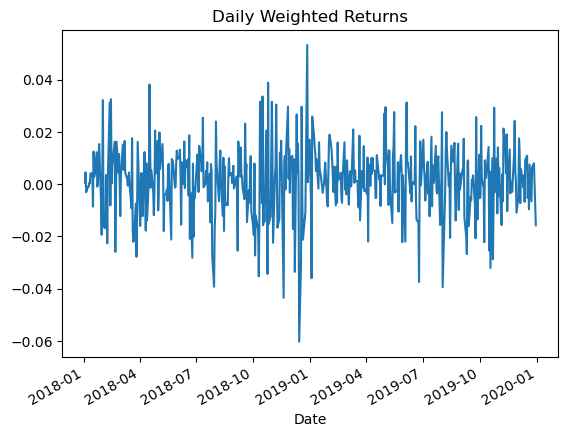

In [43]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
myportfolio_returns = daily_returns.dot(weights)
myportfolio_returns.plot (title = 'Daily Weighted Returns')
                                                     
# Display sample data
myportfolio_returns

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
# Join your returns DataFrame to the original returns DataFrame
joined_portfolios = pd.concat([combined_df, myportfolio_returns], axis = 'columns', join='inner')
joined_portfolios.columns.values[7] = 'My Portfolio'
joined_portfolios

,SFML,P&C,TGML,BHI,AL1,AL2,S&P Daily,My Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_portfolios.dropna(inplace = True)
joined_portfolios

,SFML,P&C,TGML,BHI,AL1,AL2,S&P Daily,My Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized `std`
joined_portfolios_std = joined_portfolios.std()
annualized_std = joined_portfolios_std * np.sqrt(252)
annualized_std

SFML            0.145675
P&C             0.114343
TGML            0.219833
BHI             0.227445
AL1             0.120028
AL2             0.137664
S&P Daily       0.099121
My Portfolio    0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Date'>

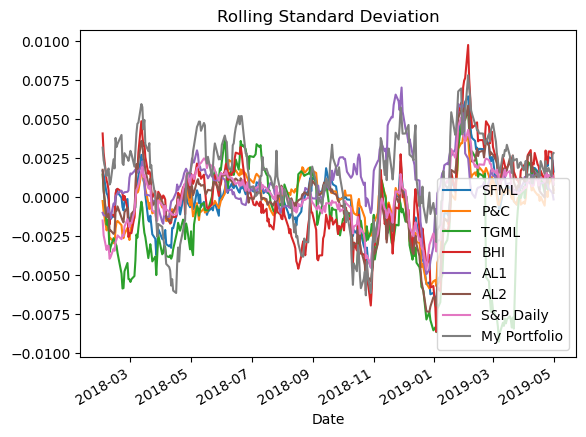

In [47]:
# Calculate rolling standard deviation
joined_portfolios_rolling_std = joined_portfolios.rolling(window=21).mean()

# Plot rolling standard deviation
joined_portfolios_rolling_std.plot(title='Rolling Standard Deviation')

### Calculate and plot the correlation

<AxesSubplot:title={'center':'Combined Portfolio Correlation'}>

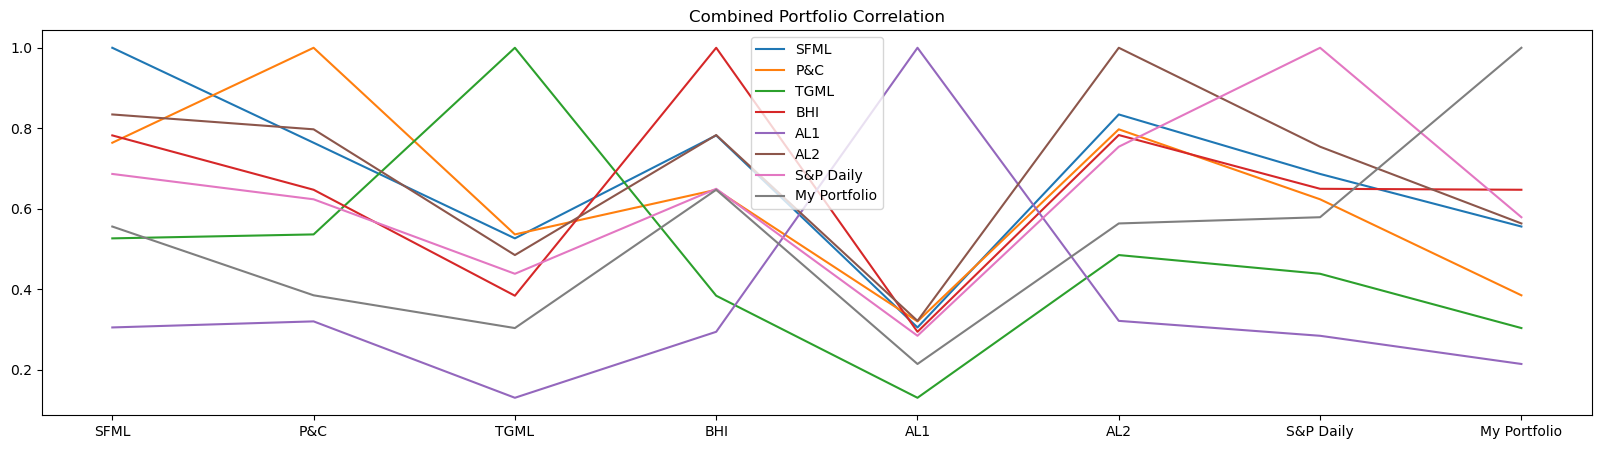

In [48]:
# Calculate and plot the correlation
new_correlation = joined_portfolios.corr()
new_correlation.plot(figsize=(20,5), title='Combined Portfolio Correlation')

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of My Portfolio Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

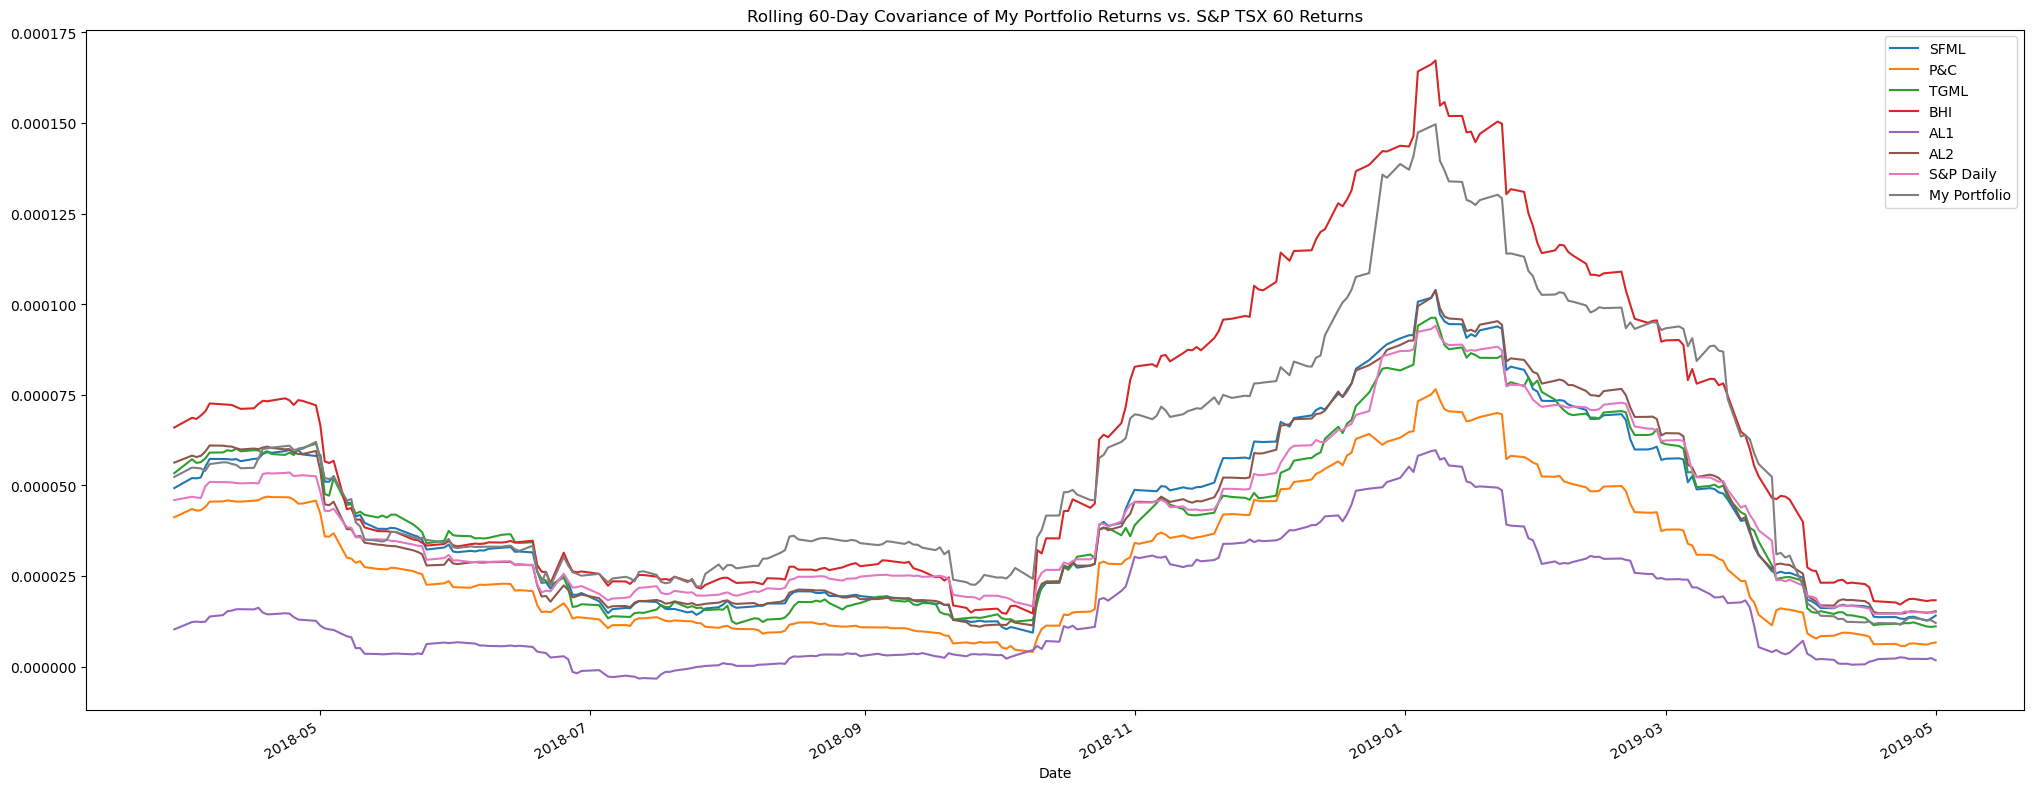

In [49]:
# Calculate and plot Beta
covariance = joined_portfolios['My Portfolio'].rolling(window=60).cov(joined_portfolios['S&P Daily'])
variance = joined_portfolios ['S&P Daily'].rolling(window=60).var()

rollingbeta_joined_portfolios = covariance / variance
rollingbeta_joined_portfolios = joined_portfolios.rolling(window=60).cov(joined_portfolios['S&P Daily'])
rollingbeta_joined_portfolios.plot(figsize=(25,10), title = 'Rolling 60-Day Covariance of My Portfolio Returns vs. S&P TSX 60 Returns')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios2 = myportfolio_returns.mean() / annualized_std

<AxesSubplot:title={'center':'Sharpe Ratios'}>

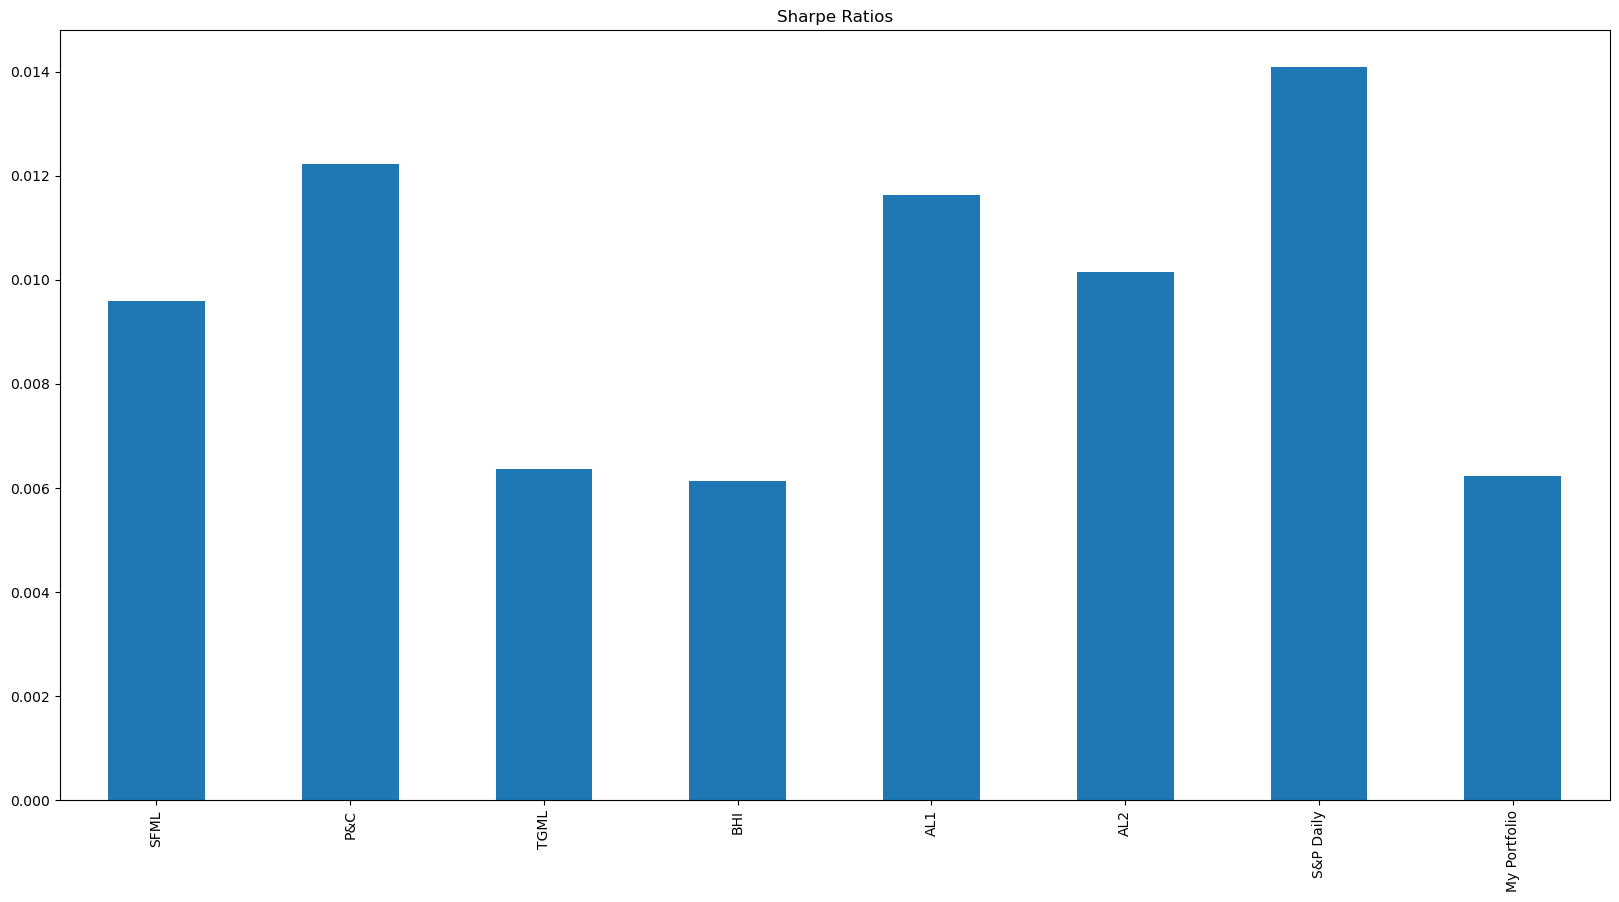

In [51]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind='bar', title='Sharpe Ratios',figsize=(20,10))

### How does your portfolio do?


In [52]:
#Setting Variables
index=0 
myportfolio_performance = sharpe_ratios2['My Portfolio']

#Determine My Portfolio Performance vs. S&P TSX 60 and the whales portfolios' Performance

for performance in sharpe_ratios2: 
    if sharpe_ratios2.index[index] == 'My Portfolio': 
        continue
    if performance == myportfolio_performance:
        print(f"My portfolio equally performed compared to {sharpe_ratios2.index[index]} portfolio")
    elif performance > myportfolio_performance:
        print(f"My portfolio outperformed compared to {sharpe_ratios2.index[index]} portfolio")
    elif performance < myportfolio_performance:
        print(f"My portfolio underperformed compared to {sharpe_ratios2.index[index]} portfolio")
    else:
        print(f"My portfoilio is not comparable to S&P TSX 60 and the whales portfolios.")
    index+=1

My portfolio outperformed compared to SFML portfolio
My portfolio outperformed compared to P&C portfolio
My portfolio outperformed compared to TGML portfolio
My portfolio underperformed compared to BHI portfolio
My portfolio outperformed compared to AL1 portfolio
My portfolio outperformed compared to AL2 portfolio
My portfolio outperformed compared to S&P Daily portfolio
